<a href="https://colab.research.google.com/github/TanviKhare/LGMVIP--DataScience/blob/main/TaskB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

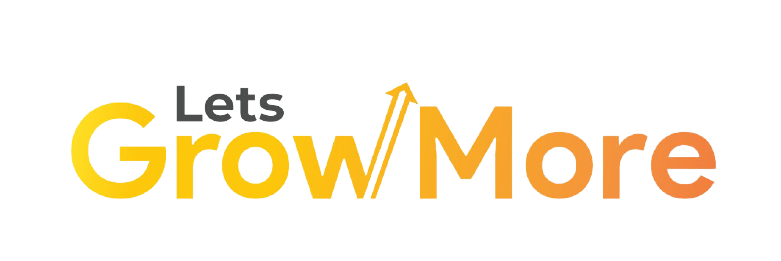

Name : Tanvi Khare

Domain: Data Science

Task Level: Beginner

Task Number : 2

2)Stock Market Prediction And Forecasting Using Stacked LSTM

Datasetlinks: : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [1]:
#Import the necessary Libraries

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [2]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data = data.iloc[::-1]
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [3]:
data.shape

(2035, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [6]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

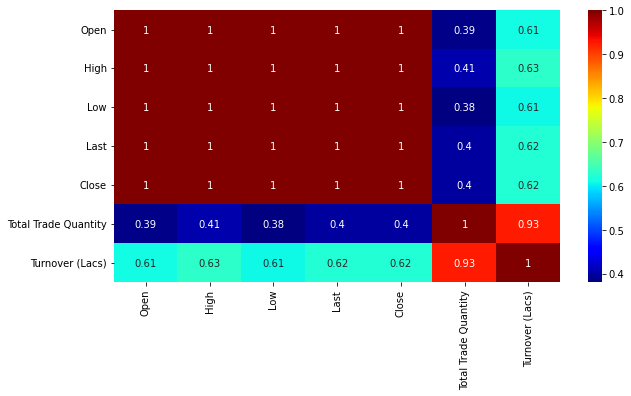

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True,cmap = 'jet')
plt.show()

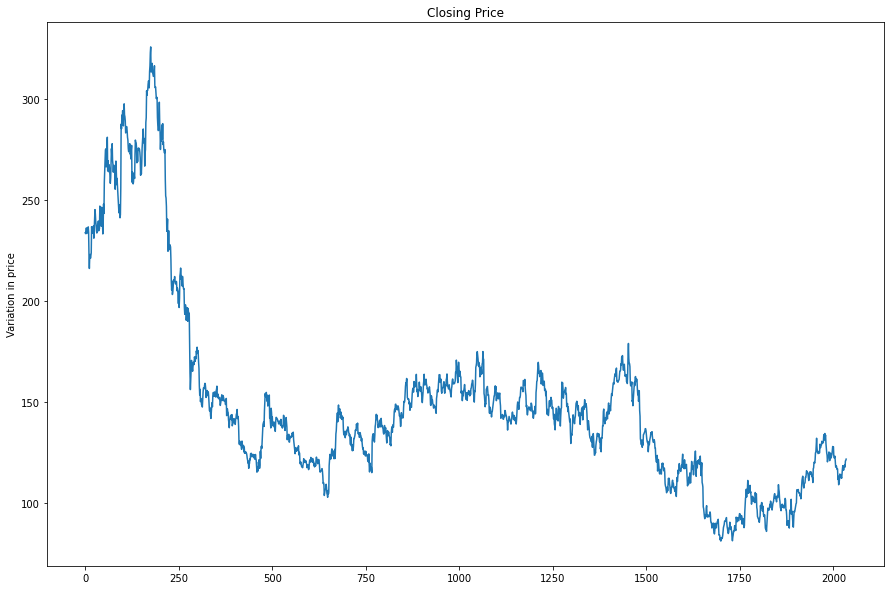

In [9]:
plt.figure(figsize = (15,10))
plt.plot(data.Close)
plt.ylabel('Variation in price')
plt.title("Closing Price")
plt.show()

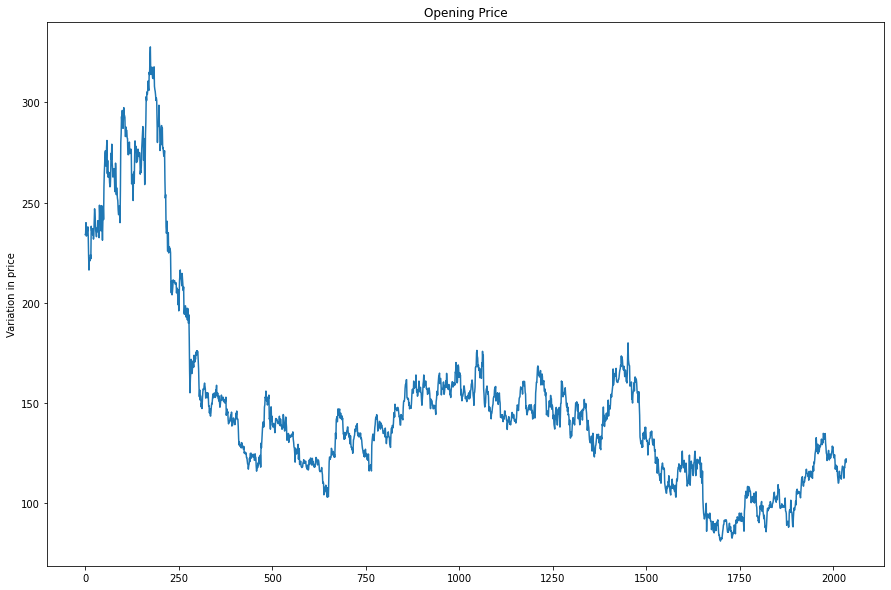

In [10]:
plt.figure(figsize = (15,10))
plt.plot(data.Open)
plt.ylabel('Variation in price')
plt.title("Opening Price")
plt.show()

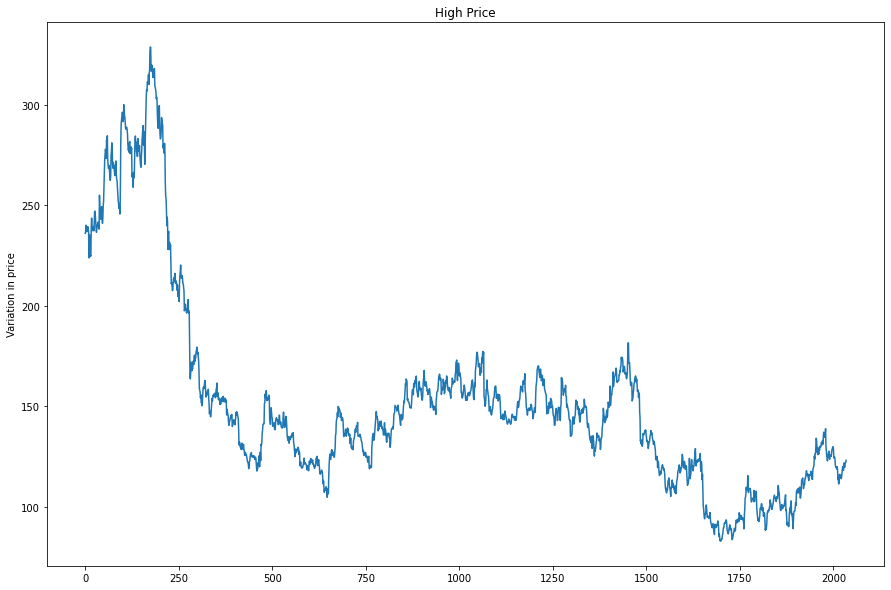

In [11]:
plt.figure(figsize = (15,10))
plt.plot(data.High)
plt.ylabel('Variation in price')
plt.title("High Price")
plt.show()

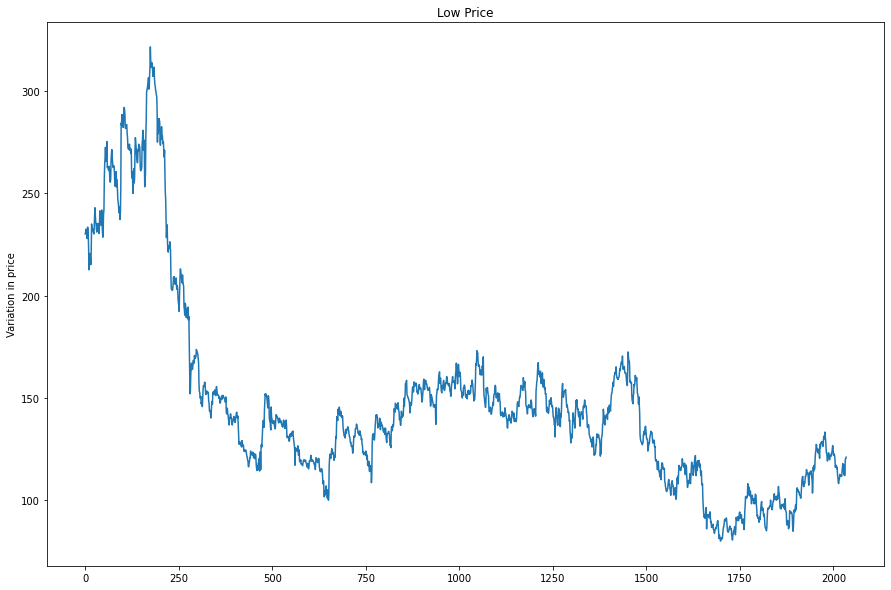

In [12]:
plt.figure(figsize = (15,10))
plt.plot(data.Low)
plt.ylabel('Variation in price')
plt.title("Low Price")
plt.show()

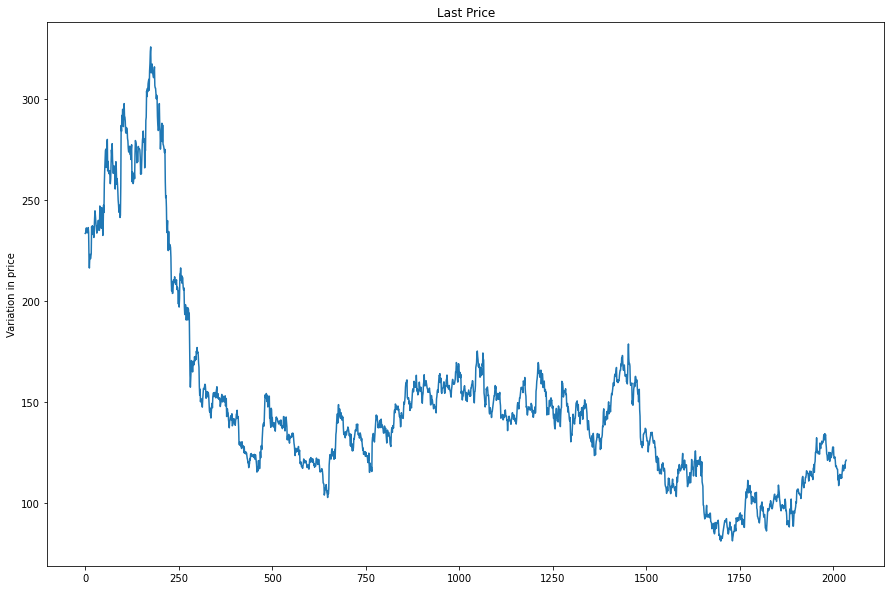

In [13]:
plt.figure(figsize = (15,10))
plt.plot(data.Last)
plt.ylabel('Variation in price')
plt.title("Last Price")
plt.show()

In [14]:
data.drop('Date', axis = 1,inplace = True)
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [15]:
dataH = data.reset_index()['High']

In [16]:
scaler = MinMaxScaler(feature_range = (0,1))
dataH = scaler.fit_transform(np.array(data.High).reshape(-1,1))

In [17]:
dataH.shape

(2035, 1)

In [18]:
dataH

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [19]:
training_size = int(len(dataH) * 0.75)
test_size = len(dataH) - training_size
train_data, test_data = dataH[0:training_size,:], dataH[training_size:len(dataH),:1]

In [20]:
def creation(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [21]:
time_step = 100
x_train, y_train = creation(train_data, time_step)
x_test, y_test = creation(test_data, time_step)

In [22]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 17s 375ms/step - loss: 0.0134 - val_loss: 0.0639
Epoch 2/100
23/23 [==============================] - 9s 384ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 3/100
23/23 [==============================] - 8s 346ms/step - loss: 8.4391e-04 - val_loss: 0.0041
Epoch 4/100
23/23 [==============================] - 8s 343ms/step - loss: 7.4801e-04 - val_loss: 0.0039
Epoch 5/100
23/23 [==============================] - 8s 345ms/step - loss: 7.1903e-04 - val_loss: 0.0028
Epoch 6/100
23/23 [==============================] - 8s 339ms/step - loss: 7.3096e-04 - val_loss: 0.0037
Epoch 7/100
23/23 [==============================] - 8s 340ms/step - loss: 6.6584e-04 - val_loss: 0.0036
Epoch 8/100
23/23 [==============================] - 8s 351ms/step - loss: 6.5587e-04 - val_loss: 0.0036
Epoch 9/100
23/23 [==============================] - 8s 342ms/step - loss: 6.4496e-04 - val_loss: 0.0062
Epoch 10/100
23/23 [==============================] - 8s 343ms

In [26]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [27]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [28]:
math.sqrt(mean_squared_error(y_train, train_predict))

135.3877546328135

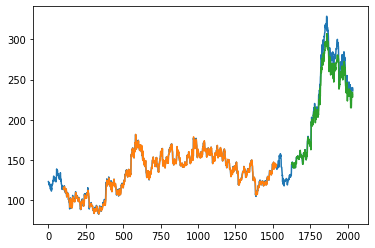

In [29]:
#Shift train prediction for plotting
n = 100
trainPredictPlot = np.empty_like(dataH)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[n:len(train_predict) + n, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(dataH)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (n * 2)+1:len(dataH) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataH))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [30]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [31]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.59279203]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 

In [33]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

data_new = dataH.tolist()
data_new.extend(lst_output)

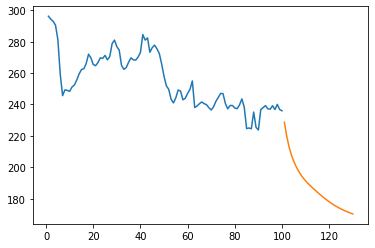

In [34]:
plt.plot(day_new, scaler.inverse_transform(dataH[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

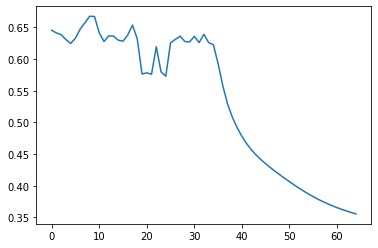

In [35]:
data_new = dataH.tolist()
data_new.extend(lst_output)
plt.plot(data_new[2000:])

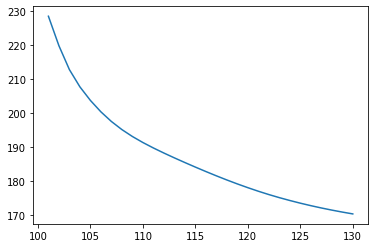

In [36]:

plt.plot(day_pred, scaler.inverse_transform(lst_output))